   # Jayson Tatum
   ### NBA draft: 2017 (Round: 1 / Pick: 3)

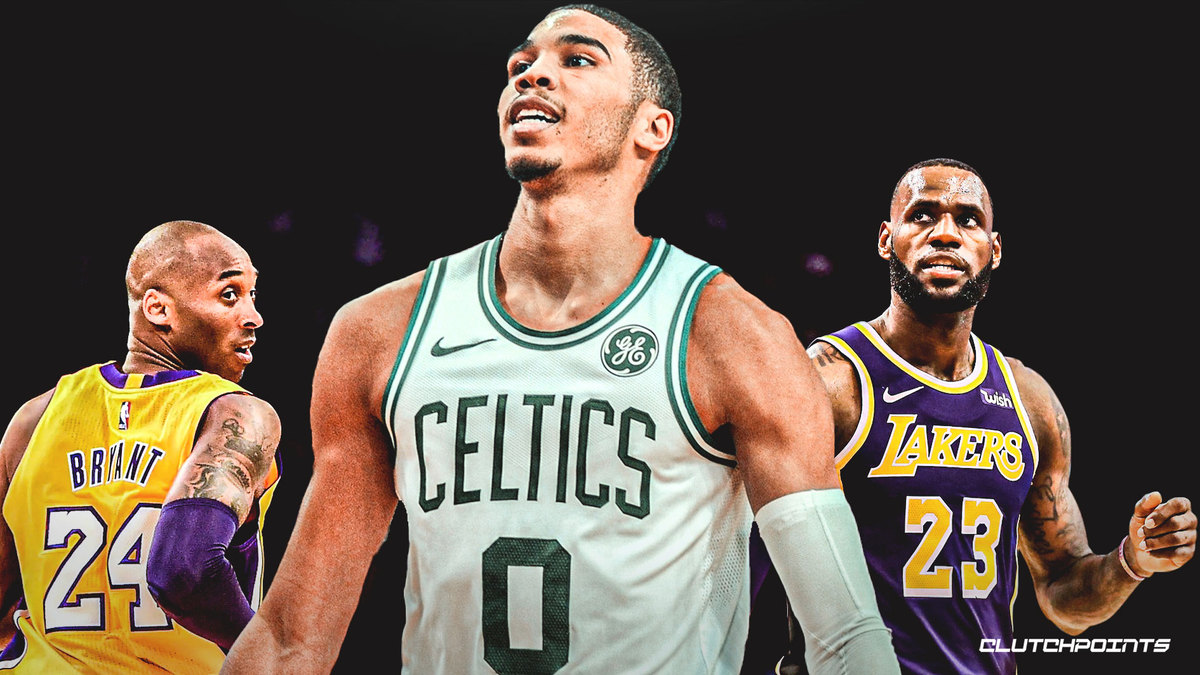

In [2]:
from IPython.display import Image
Image("tatum.jpg")

Reference: https://clutchpoints.com/jayson-tatum-makes-history-with-record-lebron-james-kobe-bryant-failed-to-achieve/

## Tatum is celtics player with a huge potential. Some people say that his game is closer to Kobe Bryant with his ability to score these mid range shots. Others argue that his ability to attack the basket efficient, reminds Lebron James style.

### With this notebook I will try to use advanced data from these players to answer the above question. In this equation I will add Michael Jordan's data for any interesting outcomes. Michael Jordan is not included in the initial combarison because he is undoubtetly the Greatest of All time. In addition, I will create a machine learning model to predict whose career of these legends, Jayson Tatum's will be closer. 
#### Data extracted from "https://www.basketball-reference.com/"

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_tatum = pd.read_csv("per_game_stats_Tatum.csv")
#df_tatum.head(6)

In [5]:
df_reg=df_tatum[df_tatum["RSorPO"]=='Regular Season']
df_reg

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season
1,2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season
2,2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season


In [6]:
df_playoffs=df_tatum[df_tatum["RSorPO"]=='Playoffs']
df_playoffs

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
3,2017-18,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
4,2018-19,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs
5,2019-20,21,BOS,NBA,PF,17,17,40.6,8.5,19.6,0.434,2.8,7.4,0.373,5.8,12.2,0.471,0.504,5.9,7.2,0.813,1.3,8.7,10.0,5.0,1.0,1.2,2.8,2.4,25.7,Jason Tatum,Playoffs


In [7]:
df_reg.set_index(['Season'],inplace=True)
df_playoffs.set_index(['Season'],inplace=True)

In [8]:
df_tatum.set_index(['Season'],inplace=True)

In [9]:
df_new=pd.concat([df_reg,df_playoffs],axis=1)
#df_new.head()

### First thing we want to visualize some data from Jayson Tatum's first three seasons

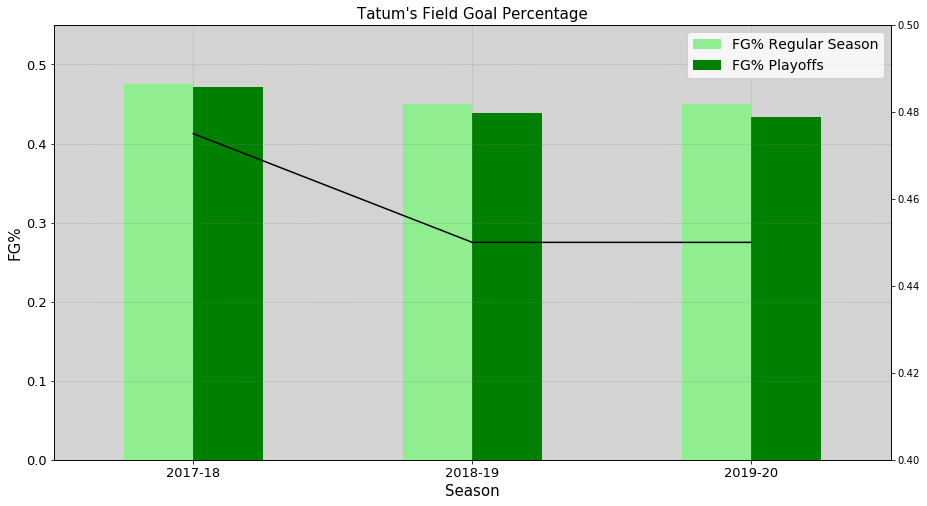

In [10]:
ax=df_new['FG%'].plot(kind='bar',figsize=(15,8),color=['lightgreen','green'],alpha=1)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's Field Goal Percentage",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('FG%',fontsize=15)
ax.legend(['FG% Regular Season','FG% Playoffs'],fontsize=14)
ax.set_ylim(0,0.55)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax1 = ax.twinx()
ax1=df_reg['FG%'].plot(kind='line',color=['black'])
ax1.set_ylim(0.4,0.5)
plt.show()

In [11]:
df_reg['FG%']

Season
2017-18    0.475
2018-19    0.450
2019-20    0.450
Name: FG%, dtype: float64

### We see that his field goal percentage is higher in the first season than the second and third. The drop was low though from 47.5% in the 1st to 45% in the 2nd and 3rd. This is maybe because he wasn't taking too much shoots in the first season as the second and third. Let's find out

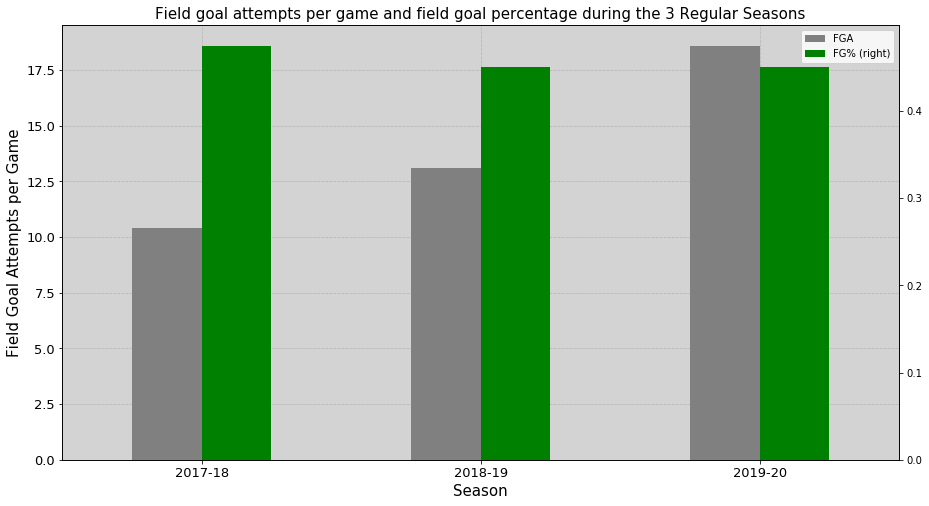

In [12]:
ax2=df_reg[['FGA','FG%']].plot(kind='bar',figsize=(15,8),color=['grey','green'],secondary_y='FG%')
ax2.set_facecolor('lightgrey')
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_title('Field goal attempts per game and field goal percentage during the 3 Regular Seasons',fontsize=15)
ax2.set_ylabel('Field Goal Attempts per Game',fontsize=15)
ax2.set_xlabel('Season',fontsize=15)
ax2.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax2.tick_params(axis='y',which='major',labelsize=13)

### This proof what we assumed. That this small drop in the FG% is becasue he takes more attempts the last two seasons. Significant is that he is realy improved in the third season where he increased the attempts from 13.1 to 18.6 with the same FG%

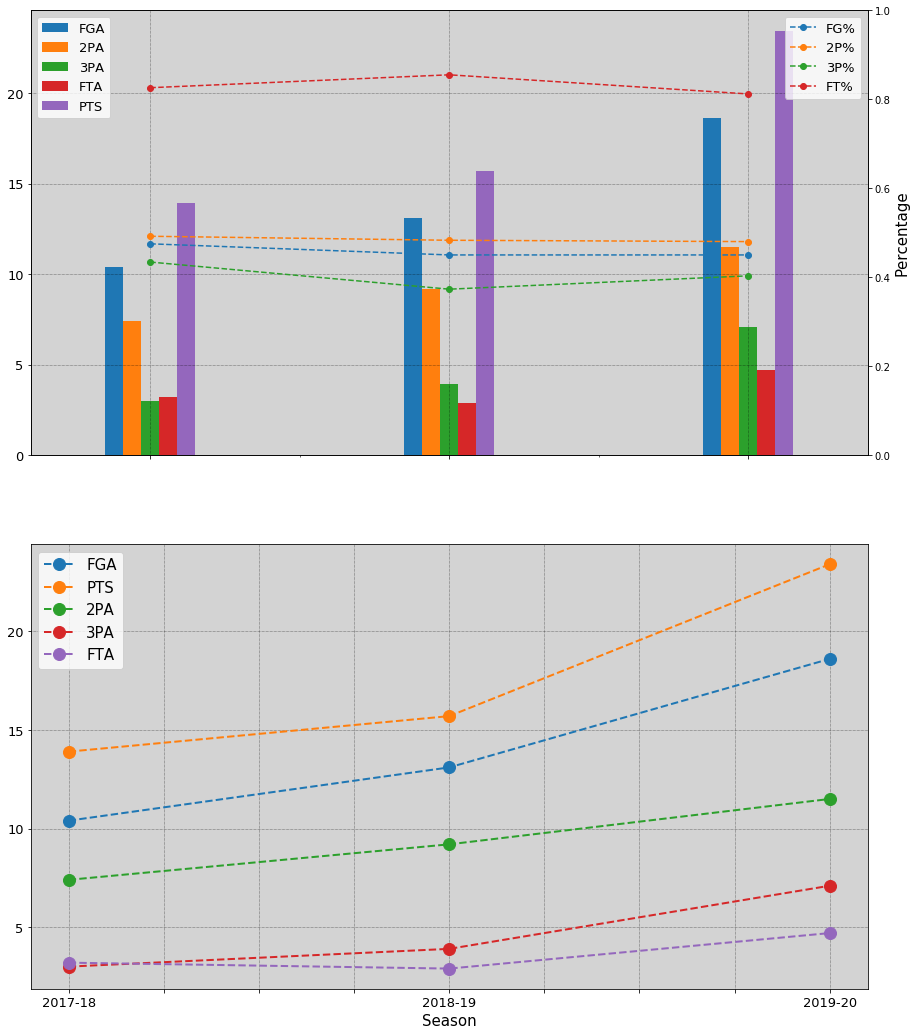

In [13]:
df_reg_new=df_reg[['FGA','FG%','3PA','3P%','2PA','2P%','FTA','FT%','TRB','AST','STL','BLK','TOV','PTS']]

fig=plt.figure(figsize=(15,18))

ax=fig.add_subplot(2,1,1)
ax=df_reg_new[['FGA','2PA','3PA','FTA','PTS']].plot(kind='bar',width=0.3,align='center',ax=ax)
#ax3=df_reg_new[['2PA','3PA']].plot(kind='bar',stacked=True,width=0.1,align='center',ax=ax,alpha=0.2,color=['grey','lightgrey'])
ax.legend(loc='upper left',fontsize=13)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Season',fontsize=13)
ax.set_ylabel('')
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.grid(color='black', linestyle='dotted', linewidth=0.5)
ax2=ax.twinx()
ax2=df_reg_new[['FG%','2P%','3P%','FT%']].plot(kind='line',style='o--',ax=ax2)
ax2.set_ylim(0,1)
ax2.set_ylabel('Percentage',fontsize=15)
ax2.tick_params(axis='y',which='major',labelsize=10)
ax2.set_xlabel('Season',fontsize=13)
ax2.legend(loc='upper right',fontsize=13)

ax1=fig.add_subplot(2,1,2)
ax1=df_reg_new[['FGA','PTS','2PA','3PA','FTA']].plot(kind='line',style='o--',linewidth=2,ms=12,ax=ax1)
ax1.set_facecolor('lightgrey')
ax1.legend(fontsize=15)
ax1.set_xlabel('Season',fontsize=15)
ax1.tick_params(axis='both',which='major',labelsize=13)
ax1.grid(color='black', linestyle='dotted', linewidth=0.5)


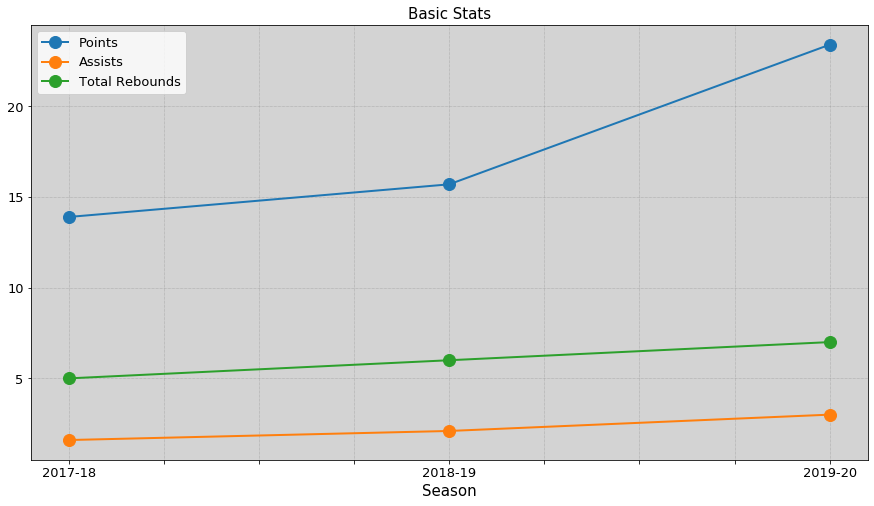

In [14]:
ax=df_reg_new[['PTS','AST','TRB']].plot(kind='line',style='o-',linewidth=2,ms=12,figsize=(15,8))
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Basic Stats',fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.legend(['Points','Assists','Total Rebounds'],fontsize=13,loc='upper left')

In [15]:
df_shoot=pd.read_csv("Shooting stats_tatum.csv")

In [16]:
df_shoot.set_index(['Season'],inplace=True)
df_shoot.head(6)

,Age,Tm,Lg,Pos,G,MP,FG%,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,Player,REorPL
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19.0,BOS,NBA,SF,80.0,2438.0,0.475,12.7,0.710,0.320,0.107,0.096,0.188,0.290,0.492,0.629,0.258,0.438,0.420,0.434,0.565,0.924,0.071,51.0,0.227,0.564,0.0,0.0,Jason Tatum,Regular Season
2018-19,20.0,BOS,NBA,SF,79.0,2455.0,0.450,13.6,0.700,0.261,0.133,0.137,0.169,0.300,0.483,0.678,0.326,0.430,0.349,0.373,0.497,0.853,0.070,68.0,0.273,0.341,0.0,0.0,Jason Tatum,Regular Season
2019-20,21.0,BOS,NBA,PF,66.0,2265.0,0.450,14.4,0.617,0.248,0.155,0.126,0.089,0.383,0.480,0.618,0.374,0.396,0.394,0.403,0.433,0.545,0.050,56.0,0.171,0.413,3.0,0.0,Jason Tatum,Regular Season
2017-18,19.0,BOS,NBA,SF,19.0,683.0,0.471,11.9,0.728,0.372,0.096,0.107,0.153,0.272,0.526,0.639,0.280,0.464,0.450,0.324,0.510,0.565,0.069,16.0,0.197,0.286,0.0,0.0,Jason Tatum,Playoffs
2018-19,20.0,BOS,NBA,SF,9.0,295.0,0.438,13.1,0.723,0.286,0.134,0.125,0.179,0.277,0.481,0.594,0.267,0.286,0.600,0.323,0.590,1.000,0.089,10.0,0.226,0.286,0.0,0.0,Jason Tatum,Playoffs
2019-20,21.0,BOS,NBA,PF,17.0,690.0,0.434,15.0,0.623,0.219,0.162,0.162,0.081,0.377,0.471,0.589,0.389,0.519,0.222,0.373,0.378,0.638,0.042,11.0,0.071,0.333,1.0,0.0,Jason Tatum,Playoffs


In [17]:
df_shoot_career=df_shoot
df_shoot.dropna(inplace=True)

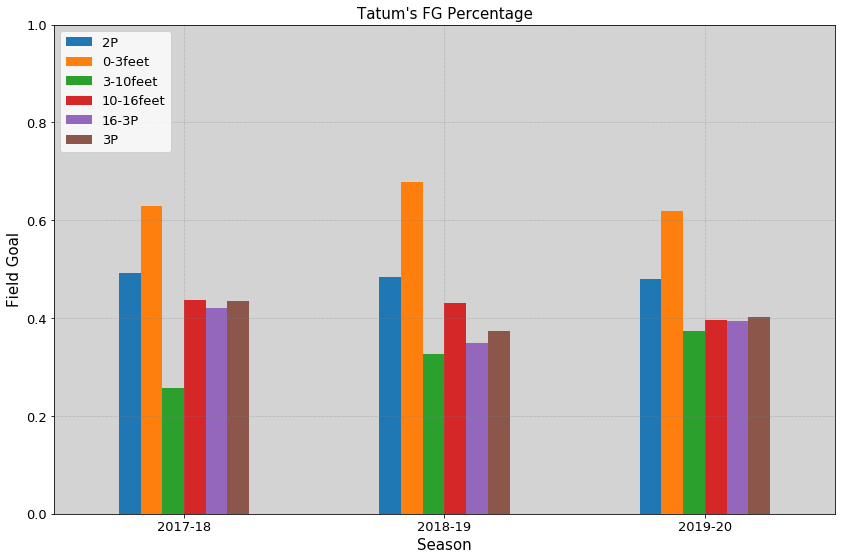

In [18]:
ax=df_shoot[df_shoot['REorPL']=='Regular Season'][['2P.1','0-3.1','3-10.1','10-16.1','16-3P.1','3P.1']].plot(kind='bar',figsize=(14,9),alpha=1)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's FG Percentage",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Field Goal',fontsize=15)
ax.set_ylim(0,1)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.legend(['2P','0-3feet','3-10feet','10-16feet','16-3P','3P'],loc='upper left',fontsize=13)
plt.show()

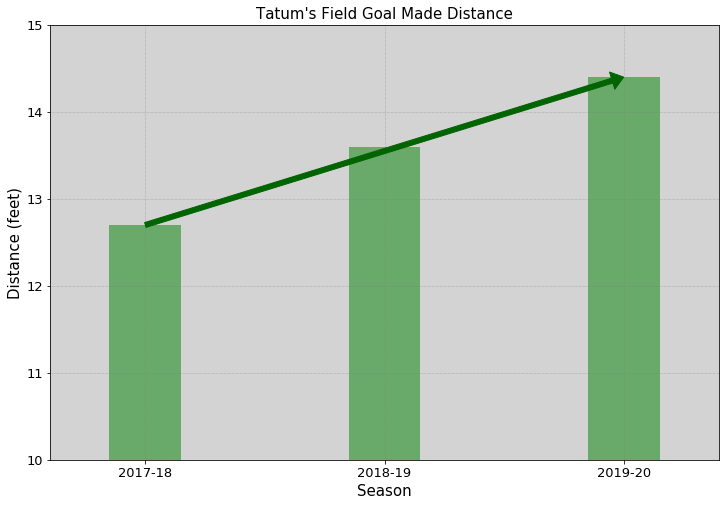

In [19]:
df_shoot.dropna()
ax=df_shoot[(df_shoot['REorPL']=='Regular Season')]['Dist.'].plot(kind='bar',figsize=(12,8),color='green',alpha=0.5,width=0.3)
#ax=df_shoot[df_shoot['REorPL']=='Regular Season']['Dist.'].plot(kind='line',color='darkgreen',linewidth=3)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's Field Goal Made Distance",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Distance (feet)',fontsize=15)
ax.set_ylim(10,15)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)

ax.annotate('',                      # s: str. Will leave it blank for no text
             xy=(2, 14.4),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(0, 12.7),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(connectionstyle='arc3', color='darkgreen',headwidth=18,width=5)
            )
plt.show()

### This graph is showing that Tatum's shoots distance is increaing through the first three seasons. What information is missing from this is if this is because Tatum shoots more 3pts or if he is attacking the basket less and shoots more mid range 2pts. Let's find out with the next graph

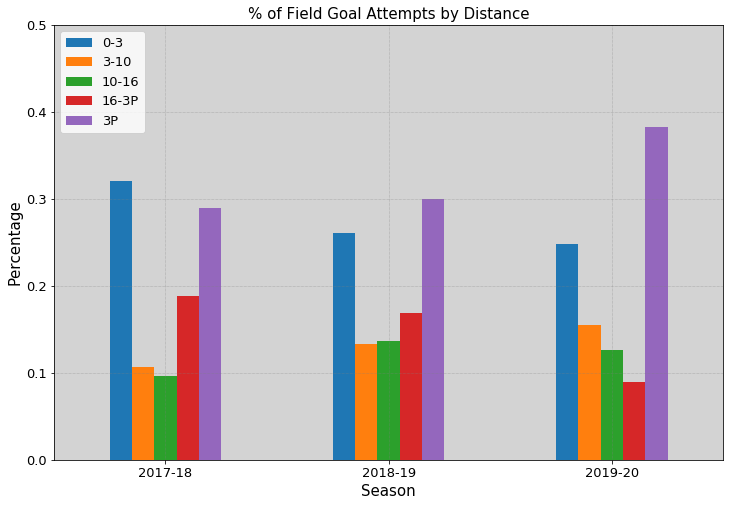

In [20]:
ax=df_shoot[df_shoot['REorPL']=='Regular Season'][['0-3','3-10','10-16','16-3P','3P']].plot(kind='bar',figsize=(12,8),alpha=1)
ax.set_facecolor('lightgrey')
ax.set_title("% of Field Goal Attempts by Distance",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax.set_ylim(0,0.5)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.legend(loc='upper left',fontsize=13)
plt.show()

### So this shows that the main reason is that he is shooting more 3pts. Also he is shooting less mid ranges from 16feet until the 3pt line.

In [21]:
df_shoot_career=pd.read_csv("Shooting stats_tatum.csv")
df_shoot_career.drop([3,4,5,6,7,8],inplace=True)
df_shoot_career=df_shoot_career[['0-3','3-10','10-16','16-3P','3P']]
df_shoot_career['Total Shots']=['2017-18','2018-19','2019-20']
df_shoot_career.set_index(['Total Shots'],inplace=True)
df_shoot_career=df_shoot_career.T
df_shoot_career

Total Shots,2017-18,2018-19,2019-20
0-3,0.320,0.261,0.248
3-10,0.107,0.133,0.155
10-16,0.096,0.137,0.126
16-3P,0.188,0.169,0.089
3P,0.290,0.300,0.383


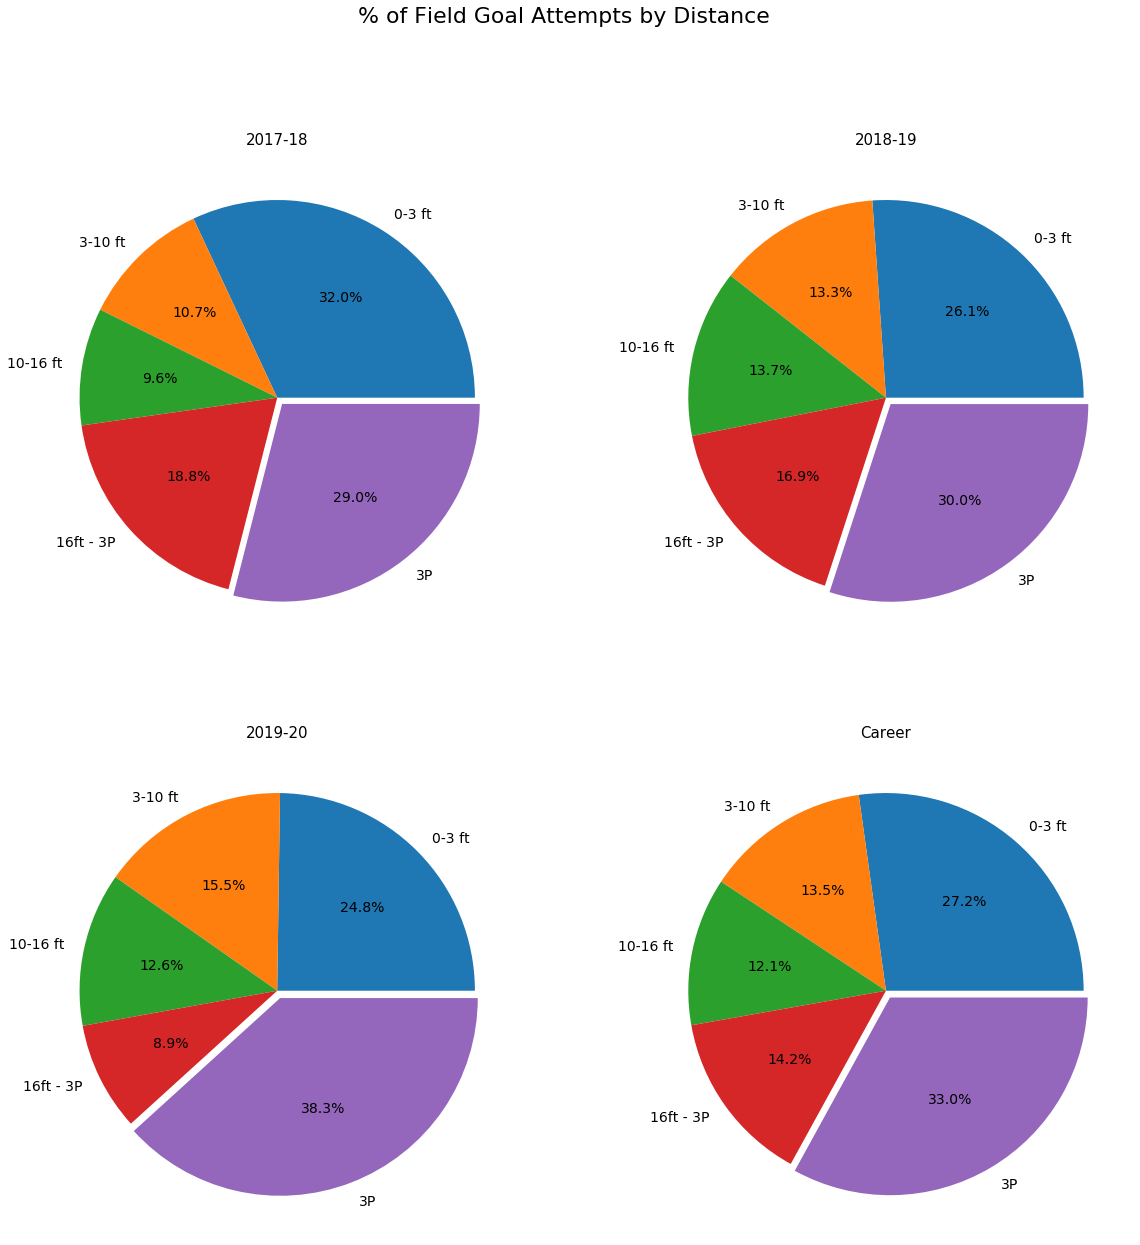

In [22]:
df_shoot_career=pd.read_csv("Shooting stats_tatum.csv")
df_shoot_career.drop([3,4,5,7,8],inplace=True)
df_shoot_career=df_shoot_career[['0-3','3-10','10-16','16-3P','3P']]
df_shoot_career.rename(columns={'0-3':"0-3 ft",'3-10':'3-10 ft','10-16':'10-16 ft','16-3P':'16ft - 3P'},inplace=True)
df_shoot_career['Total Shots']=['2017-18','2018-19','2019-20','Career']
df_shoot_career.set_index(['Total Shots'],inplace=True)
df_shoot_career=df_shoot_career.T
df_shoot_career
#print(df_shoot_career)
fig=plt.figure(figsize=(20,20))
fig.suptitle('% of Field Goal Attempts by Distance',fontsize=22)
ax=fig.add_subplot(2,2,1)
ax=df_shoot_career['2017-18'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax.set_title(f"2017-18",fontsize=15)
ax.set_ylabel('')

ax1=fig.add_subplot(2,2,2)
ax1=df_shoot_career['2018-19'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax1.set_title(f"2018-19",fontsize=15)
ax1.set_ylabel('')

ax2=fig.add_subplot(2,2,3)
ax2=df_shoot_career['2019-20'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax2.set_title(f"2019-20",fontsize=15)
ax2.set_ylabel('')

ax3=fig.add_subplot(2,2,4)
ax3=df_shoot_career['Career'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax3.set_title(f"Career",fontsize=15)
ax3.set_ylabel('')

plt.show()

In [23]:
df_tatum.head()

,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season
2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season
2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season
2017-18,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
2018-19,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs


In [24]:
dfnew=pd.read_csv('per_game_stats.csv')
dfnew.head(2)

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,0.42,0.8,2.7,0.30,7.1,16.1,0.438,0.438,4.4,5.8,0.76,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,0.47,1.4,3.9,0.36,8.6,17.2,0.499,0.504,6.0,8.0,0.75,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,Lebron James,Regular Season


In [25]:
df_kobe=dfnew[dfnew['Player']=='Kobe Bryant']
df_kobe.set_index('Season',inplace=True)
df_kobe_reg=df_kobe[df_kobe['RSorPO']=='Regular Season']
df_kobe_pl=df_kobe[df_kobe['RSorPO']=='Playoffs']
df_kobe_FGreg=df_kobe_reg[['FGA','FG%','G','FT%']]
df_kobe_FGreg.rename(columns={'FGA':'FGA Regular','FG%':'FG% Regular','G':'Games Regular'},inplace=True)
df_kobe_FGpl=df_kobe_pl[['FGA','FG%','G']]
df_kobe_FGpl.rename(columns={'FGA':'FGA Playoffs','FG%':'FG% Playoffs','G':'Games Playoffs'},inplace=True)
df_kobe_FG=pd.concat([df_kobe_FGreg,df_kobe_FGpl],axis=1)
df_kobe_FG.head()

c:\users\dee\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,FGA Regular,FG% Regular,Games Regular,FT%,FGA Playoffs,FG% Playoffs,Games Playoffs
1996-97,5.9,0.42,71,0.83,6.1,0.38,9.0
1997-98,11.6,0.42,79,0.79,6.9,0.41,11.0
1998-99,15.6,0.46,50,0.84,17.8,0.43,8.0
1999-00,17.9,0.47,66,0.82,17.9,0.44,22.0
2000-01,22.2,0.46,68,0.85,22.4,0.47,16.0


In [26]:
df_king=dfnew[dfnew['Player']=='Lebron James']
df_king.set_index('Season',inplace=True)
df_king_reg=df_king[df_king['RSorPO']=='Regular Season']
df_king_pl=df_king[df_king['RSorPO']=='Playoffs']
df_king_FGreg=df_king_reg[['FGA','FG%','G','FT%']]
df_king_FGreg.rename(columns={'FGA':'FGA Regular','FG%':'FG% Regular','G':'Games Regular'},inplace=True)
df_king_FGpl=df_king_pl[['FGA','FG%','G']]
df_king_FGpl.rename(columns={'FGA':'FGA Playoffs','FG%':'FG% Playoffs','G':'Games Playoffs'},inplace=True)
df_king_FG=pd.concat([df_king_FGreg,df_king_FGpl],axis=1)
df_king_FG.head()

c:\users\dee\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,FGA Regular,FG% Regular,Games Regular,FT%,FGA Playoffs,FG% Playoffs,Games Playoffs
2003-04,18.9,0.42,79,0.76,NaN,NaN,NaN
2004-05,21.1,0.47,80,0.75,NaN,NaN,NaN
2005-06,23.1,0.48,79,0.74,23.6,0.47,13.0
2006-07,20.8,0.48,78,0.70,20.0,0.42,20.0
2007-08,21.9,0.48,75,0.71,21.2,0.41,13.0


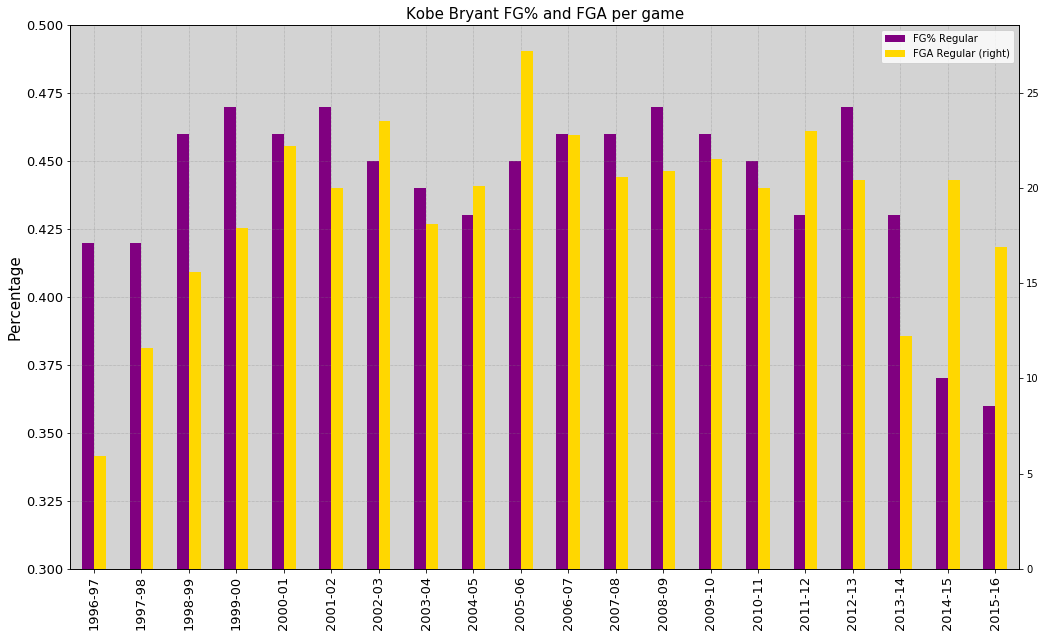

In [27]:
ax=df_kobe_FG[['FG% Regular','FGA Regular']].plot(kind='bar',figsize=(17,10),color=['purple','gold'],secondary_y='FGA Regular')
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Kobe Bryant FG% and FGA per game',fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylim(0.3,0.5)
plt.show()

In [28]:
df_kobe_stats=df_kobe[df_kobe['RSorPO']=='Regular Season'][['PTS','AST','TRB','STL']]
df_kobe_stats.reset_index(inplace=True)
df_kobe_stats.head()

,Season,PTS,AST,TRB,STL
0,1996-97,7.6,1.3,1.9,0.7
1,1997-98,15.4,2.5,3.1,0.9
2,1998-99,19.9,3.8,5.3,1.4
3,1999-00,22.5,4.9,6.3,1.6
4,2000-01,28.5,5.0,5.9,1.7


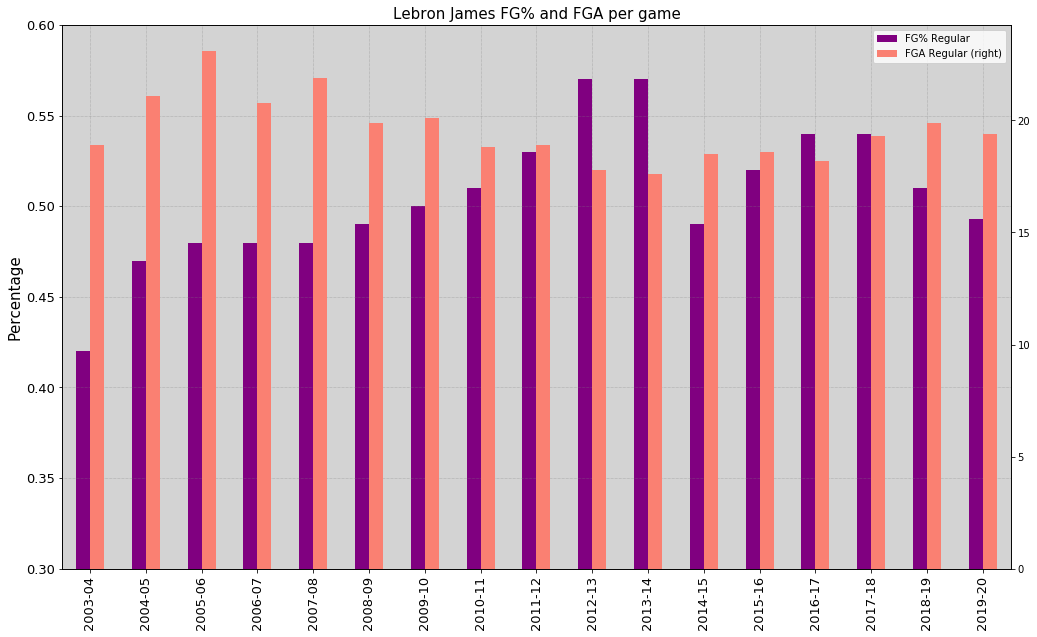

In [29]:
ax=df_king_FG[['FG% Regular','FGA Regular']].plot(kind='bar',figsize=(17,10),color=['purple','salmon'],secondary_y='FGA Regular')
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Lebron James FG% and FGA per game',fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylim(0.3,0.6)
plt.show()

In [30]:
df_king_stats=df_king[df_king['RSorPO']=='Regular Season'][['PTS','AST','TRB','STL']]
df_king_stats.reset_index(inplace=True)
df_king_stats.rename(columns={'PTS':'PTSlebron','AST':'ASTlebron','TRB':'TRBlebron'},inplace=True)
df_king_stats.head()

,Season,PTSlebron,ASTlebron,TRBlebron,STL
0,2003-04,20.9,5.9,5.5,1.6
1,2004-05,27.2,7.2,7.4,2.2
2,2005-06,31.4,6.6,7.0,1.6
3,2006-07,27.3,6.0,6.7,1.6
4,2007-08,30.0,7.2,7.9,1.8


In [31]:
df_tatum=df_reg_new[['PTS','AST','TRB']].reset_index()
df_tatum.rename(columns={'PTS':'PTS-JT','AST':'AST-JT','TRB':'TRB-JT'},inplace=True)
df_points=pd.concat([df_kobe_stats['PTS'],df_king_stats['PTSlebron'],df_tatum['PTS-JT']],axis=1)
df_assist=pd.concat([df_kobe_stats['AST'],df_king_stats['ASTlebron'],df_tatum['AST-JT']],axis=1)
df_rebound=pd.concat([df_kobe_stats['TRB'],df_king_stats['TRBlebron'],df_tatum['TRB-JT']],axis=1)

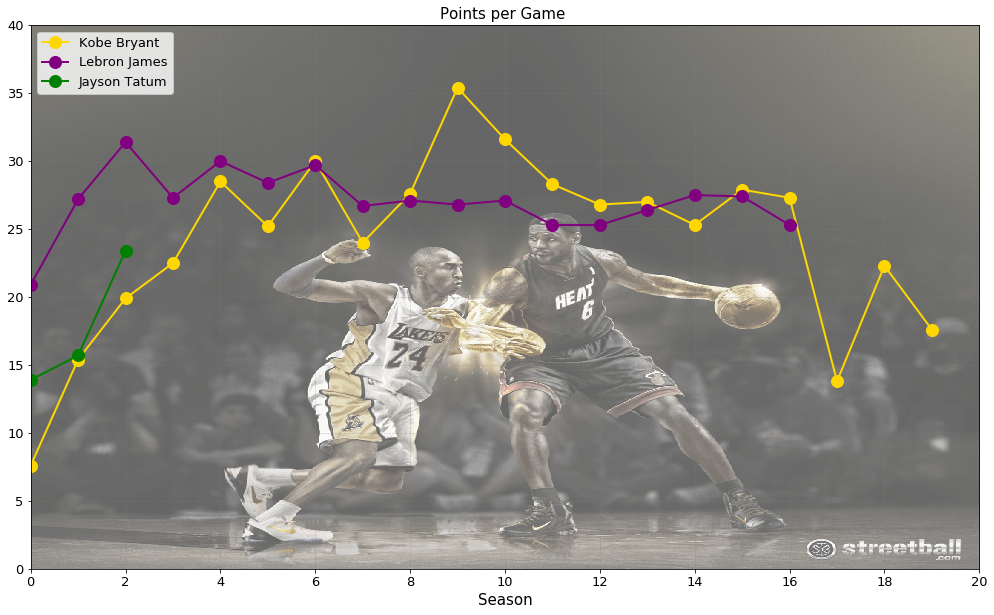

In [32]:
img = plt.imread("kobe.png")
ax=df_points[['PTS','PTSlebron','PTS-JT']].plot(kind='line',marker='o',style='-',linewidth=2,ms=12,color=['gold','purple','green'],figsize=(17,10))
#ax=df_kobe_stats[['PTS','AST','TRB']].plot(kind='line',style='o-',linewidth=2,ms=12,figsize=(17,10))
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Points per Game ',fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.legend(['Kobe Bryant','Lebron James','Jayson Tatum'],fontsize=13,loc='upper left')
ax.set_xticks(np.arange(0,21, 2))
ax.imshow(img,aspect='auto',alpha=0.6 ,extent=[0, 20, 0, 40])


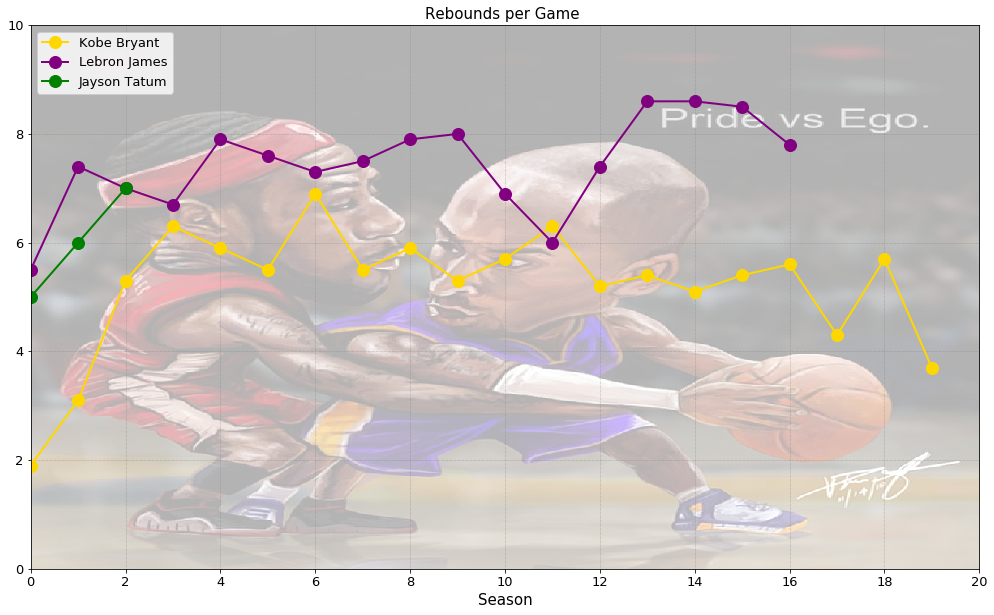

In [33]:
img = plt.imread("both.jpg")
ax=df_rebound.plot(kind='line',marker='o',style='-',linewidth=2,ms=12,color=['gold','purple','green'],figsize=(17,10))
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Rebounds per Game ',fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.legend(['Kobe Bryant','Lebron James','Jayson Tatum'],fontsize=13,loc='upper left')
ax.set_xticks(np.arange(0,21, 2))
ax.imshow(img,aspect='auto',alpha=0.3 ,extent=[0, 20, 0, 10])

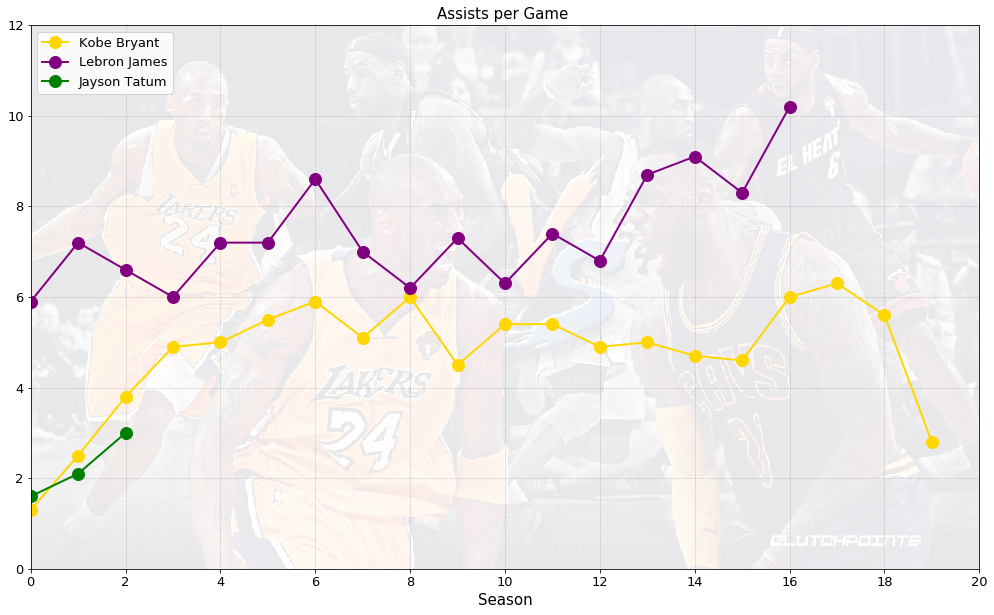

In [34]:
img = plt.imread("lebron.jpg")
ax=df_assist[['AST','ASTlebron','AST-JT']].plot(kind='line',marker='o',style='-',linewidth=2,ms=12,color=['gold','purple','green'],figsize=(17,10))
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Assists per Game ',fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.legend(['Kobe Bryant','Lebron James','Jayson Tatum'],fontsize=13,loc='upper left')
ax.set_xticks(np.arange(0,21, 2))
ax.imshow(img,aspect='auto',alpha=0.1 ,extent=[0, 20, 0, 12])

### In order for these graphs above to be reliable, we have to ensure that there was enough games played in the season. For instance one season someone may played only a few games because of injury

Wallpapers References:
- https://wallpaperaccess.com/lebron-james-and-kobe-bryant
- https://www.pinterest.ch/pin/3307399696430104/
- https://clutchpoints.com/kobe-bryant-vs-lebron-james-everything-you-need-to-know/

In [35]:
df_games=pd.concat([df_kobe_FGreg['Games Regular'].reset_index(),df_king_FGreg['Games Regular'].reset_index(),df_reg['G'].reset_index()],axis=1)
del df_games['Season']
df_games.head()

,Games Regular,Games Regular,G
0,71,79.0,80.0
1,79,80.0,79.0
2,50,79.0,66.0
3,66,78.0,NaN
4,68,75.0,NaN


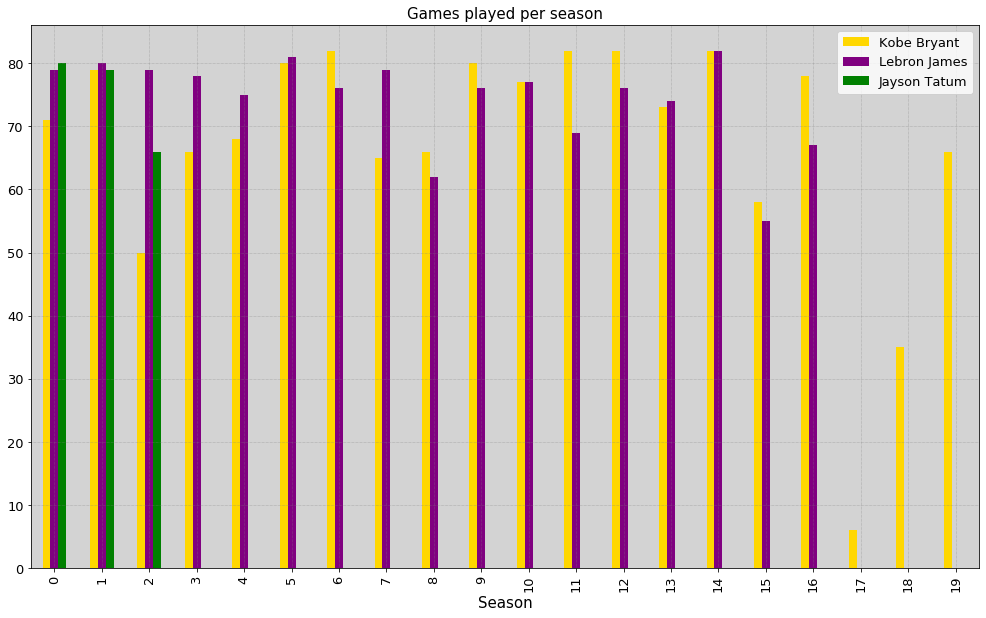

In [36]:
ax=df_games.plot(kind='bar',figsize=(17,10),color=['gold','purple','green'])
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Games played per season',fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(['Kobe Bryant','Lebron James','Jayson Tatum'],fontsize=13,loc='upper right')
plt.show()

### We the above graph we can see that in Kobe's 17th season when his Points per Game dropped significantly, he played only 6 games. Also we know that Tatum didn't have any injury in his first 3 seasons. His 3rd season, he played around 66 games beacause the season was around 70 games instead of 82 because of covid

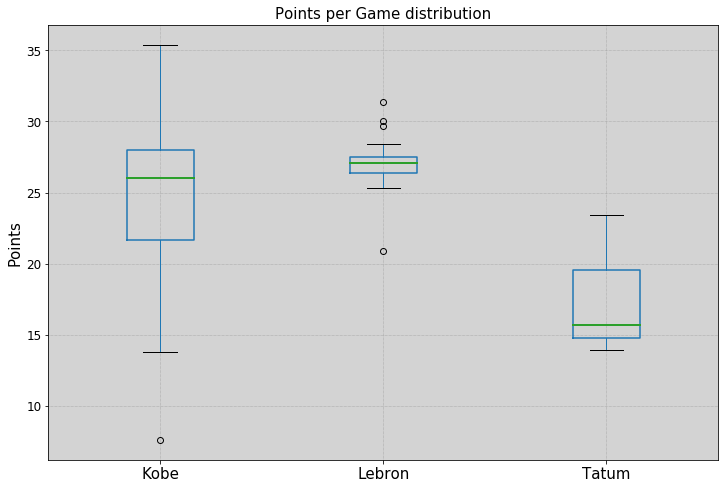

In [37]:
df_points.rename(columns={'PTS':'Kobe','PTSlebron':'Lebron','PTS-JT':'Tatum'},inplace=True)
ax=df_points.plot(kind='box',figsize=(12,8),boxprops = dict(linestyle='-', linewidth=1.5, color='darkgoldenrod'),medianprops =dict(linewidth=2,color='firebrick'),showfliers=True) #fliers/outliers are the dots 
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Points per Game distribution',fontsize=15)
ax.set_ylabel('Points',fontsize=15)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [38]:
df_points.describe()

,Kobe,Lebron,Tatum
count,20.000000,17.000000,3.000000
mean,24.200000,27.047059,17.666667
std,6.611632,2.298129,5.046121
min,7.600000,20.900000,13.900000
25%,21.700000,26.400000,14.800000
50%,26.050000,27.100000,15.700000
75%,28.000000,27.500000,19.550000
max,35.400000,31.400000,23.400000


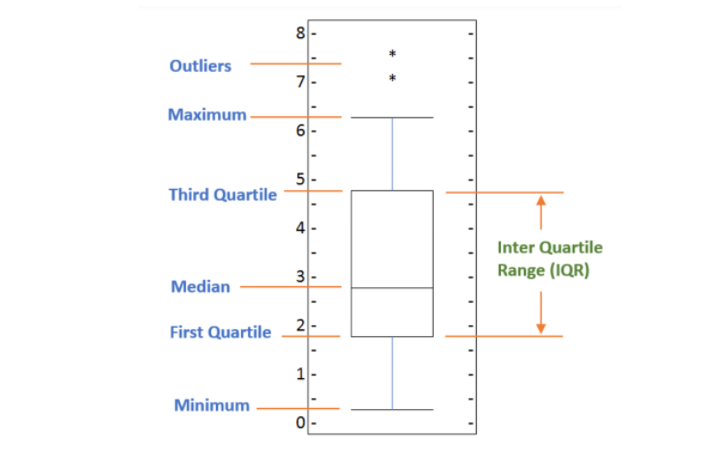

In [39]:
Image(r"C:\Users\dee\Documents\Python\Tatum/box plot.png")

### We can also see from the graph and the table the outlier 17th season of Kobe. In addition, Lebron until now had more consistent seasons.

In [40]:
df_shots=pd.read_csv('Shooting stats.csv')
df_shots=df_shots[df_shots['Season']=='Career']
df_shots=df_shots[['0-3','3-10','10-16','16-3P','3P','Player','RSorPO']]
df_shots.rename(columns={'0-3':"0-3 ft",'3-10':'3-10 ft','10-16':'10-16 ft','16-3P':'16ft - 3P'},inplace=True)

df_shots_kobe=df_shots[df_shots['Player']=='Kobe Bryant']
df_shots_kobe=df_shots_kobe[df_shots['RSorPO']=='Regular Season'].T
df_KB_Reg=df_shots_kobe.drop(['Player','RSorPO'])
df_KB_Reg.rename(columns={43:'CareerKB'},inplace=True)


df_shots_king=df_shots[df_shots['Player']=='Lebron James']
df_shots_king=df_shots_king[df_shots['RSorPO']=='Regular Season'].T
df_LB_Reg=df_shots_king.drop(['Player','RSorPO'])
df_LB_Reg.rename(columns={22:'CareerLBJ'},inplace=True)


<ipython-input-40-05dd7edbe54d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_shots_kobe=df_shots_kobe[df_shots['RSorPO']=='Regular Season'].T
<ipython-input-40-05dd7edbe54d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_shots_king=df_shots_king[df_shots['RSorPO']=='Regular Season'].T


Text(0.5, 0, 'Lebron')

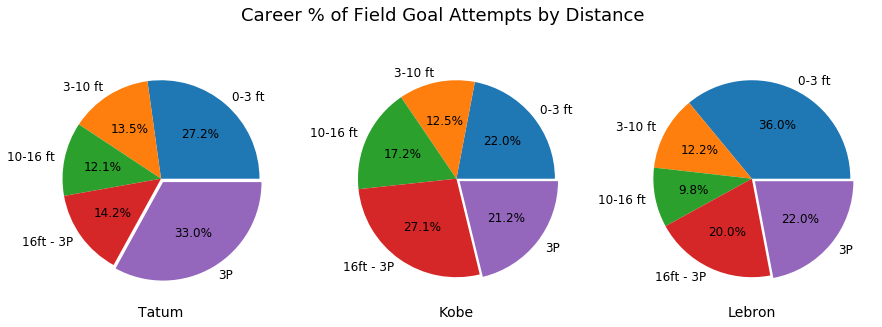

In [41]:
fig=plt.figure(figsize=(15,5))
fig.suptitle('Career % of Field Goal Attempts by Distance',fontsize=18)
ax=fig.add_subplot(1,3,1)
ax=df_shoot_career['Career'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=12)
ax.set_ylabel('')
ax.set_xlabel('Tatum', fontsize=14)

ax1=fig.add_subplot(1,3,2)
ax1=df_KB_Reg['CareerKB'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=12)
ax1.set_ylabel('')
ax1.set_xlabel('Kobe', fontsize=14)

ax2=fig.add_subplot(1,3,3)
ax2=df_LB_Reg['CareerLBJ'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=12)
ax2.set_ylabel('')
ax2.set_xlabel('Lebron', fontsize=14)

In [42]:
df_FG=pd.read_csv('Shooting Stats.csv')
df_FG.head()

,Season,Age,Tm,Lg,Pos,G,MP,FG%,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,Player,RSorPO
0,1996-97,33.0,CHI,NBA,SG,82,3106,0.486,13.2,0.843,0.184,0.072,0.304,0.283,0.157,0.507,0.510,0.507,0.492,0.521,0.374,0.502,0.739,0.027,49,0.057,0.412,0,0,Michael Jordan,Regular Season
1,1997-98,34.0,CHI,NBA,SG,82,3181,0.465,12.2,0.933,0.230,0.101,0.274,0.328,0.067,0.482,0.621,0.391,0.422,0.462,0.238,0.498,0.800,0.049,89,0.032,0.500,1,0,Michael Jordan,Regular Season
2,2001-02,38.0,WAS,NBA,SF,60,2093,0.416,13.7,0.960,0.122,0.112,0.328,0.399,0.040,0.426,0.615,0.297,0.419,0.409,0.189,0.442,0.700,0.015,20,0.038,0.500,0,0,Michael Jordan,Regular Season
3,2002-03,39.0,WAS,NBA,SF,82,3031,0.445,13.8,0.964,0.138,0.088,0.303,0.435,0.036,0.450,0.614,0.363,0.439,0.424,0.291,0.508,0.875,0.014,21,0.127,0.429,0,0,Michael Jordan,Regular Season
4,Career,NaN,NaN,NBA,NaN,306,11411,0.457,13.1,0.920,0.174,0.092,0.300,0.354,0.080,0.469,0.585,0.388,0.446,0.453,0.315,0.491,0.760,0.028,179,0.056,0.433,1,0,Michael Jordan,Regular Season


In [43]:
df_FGKB_reg=df_FG[(df_FG['Player']=='Kobe Bryant') & (df_FG['RSorPO']=='Regular Season')][['Season','2P.1','0-3.1','3-10.1','10-16.1','16-3P.1','3P.1']].reset_index()
df_FGKB_reg.drop(20,inplace=True)
df_FGKB_reg.drop(columns=['index','Season'],inplace=True)

df_FT_KB=df_kobe_FG['FT%'].reset_index()
del df_FT_KB['index']

df_FG_KB=pd.concat([df_FGKB_reg,df_FT_KB],axis=1)
df_FG_KB.head()

,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,FT%
0,0.437,0.469,0.469,0.273,0.460,0.375,0.83
1,0.456,0.613,0.345,0.347,0.323,0.341,0.79
2,0.494,0.720,0.461,0.394,0.373,0.267,0.84
3,0.489,0.683,0.377,0.397,0.435,0.319,0.82
4,0.489,0.653,0.409,0.462,0.410,0.305,0.85


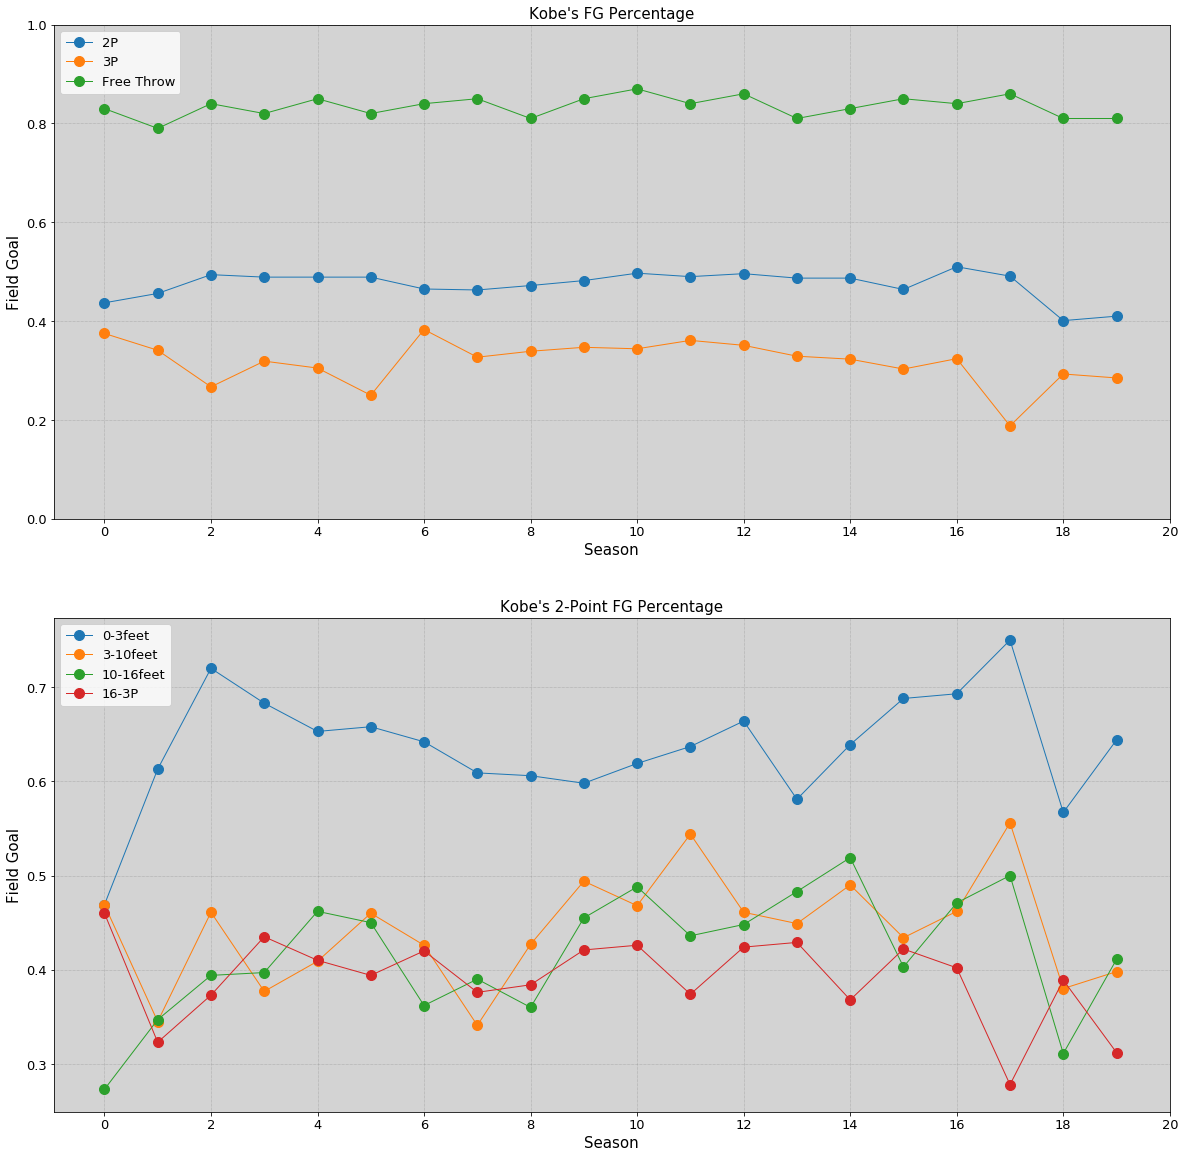

In [44]:
fig=plt.figure(figsize=(40,10))

ax=fig.add_subplot(2,1,1)
ax=df_FG_KB[['2P.1','3P.1','FT%']].plot(kind='line',marker='o',style='-',linewidth=1,ms=10,ax=ax)
ax.set_facecolor('lightgrey')
ax.set_title("Kobe's FG Percentage",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Field Goal',fontsize=15)
ax.set_ylim(0,1)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.set_xticks(np.arange(0,21, 2))
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.legend(['2P','3P','Free Throw'],loc='upper left',fontsize=13)

ax1=fig.add_subplot(2,1,2)
ax1=df_FG_KB[['0-3.1','3-10.1','10-16.1','16-3P.1']].plot(kind='line',marker='o',style='-',linewidth=1,ms=10,figsize=(20,20),ax=ax1)
ax1.set_facecolor('lightgrey')
ax1.set_title("Kobe's 2-Point FG Percentage",fontsize=15)
ax1.set_xlabel('Season',fontsize=15)
ax1.set_ylabel('Field Goal',fontsize=15)
ax1.legend(['0-3feet','3-10feet','10-16feet','16-3P'],loc='upper left',fontsize=13)
ax1.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax1.tick_params(axis='y', which='major', labelsize=13)
ax1.set_xticks(np.arange(0,21, 2))
ax1.grid(color='grey', linestyle='dotted', linewidth=0.5)
plt.show()

In [45]:
df_FGLBJ_reg=df_FG[(df_FG['Player']=='Lebron James') & (df_FG['RSorPO']=='Regular Season')][['Season','2P.1','0-3.1','3-10.1','10-16.1','16-3P.1','3P.1']].reset_index()
df_FGLBJ_reg.drop(17,inplace=True)
df_FGLBJ_reg.drop(columns=['index','Season'],inplace=True)

df_FT_LBJ=df_king_FG['FT%'].reset_index()
del df_FT_LBJ['index']

df_FG_LBJ=pd.concat([df_FGLBJ_reg,df_FT_LBJ],axis=1)
df_FG_LBJ.head()

,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,FT%
0,0.438,0.604,0.356,0.313,0.352,0.290,0.76
1,0.499,0.725,0.370,0.324,0.373,0.351,0.75
2,0.518,0.689,0.411,0.304,0.398,0.335,0.74
3,0.513,0.725,0.406,0.361,0.346,0.319,0.70
4,0.531,0.706,0.426,0.303,0.372,0.315,0.71


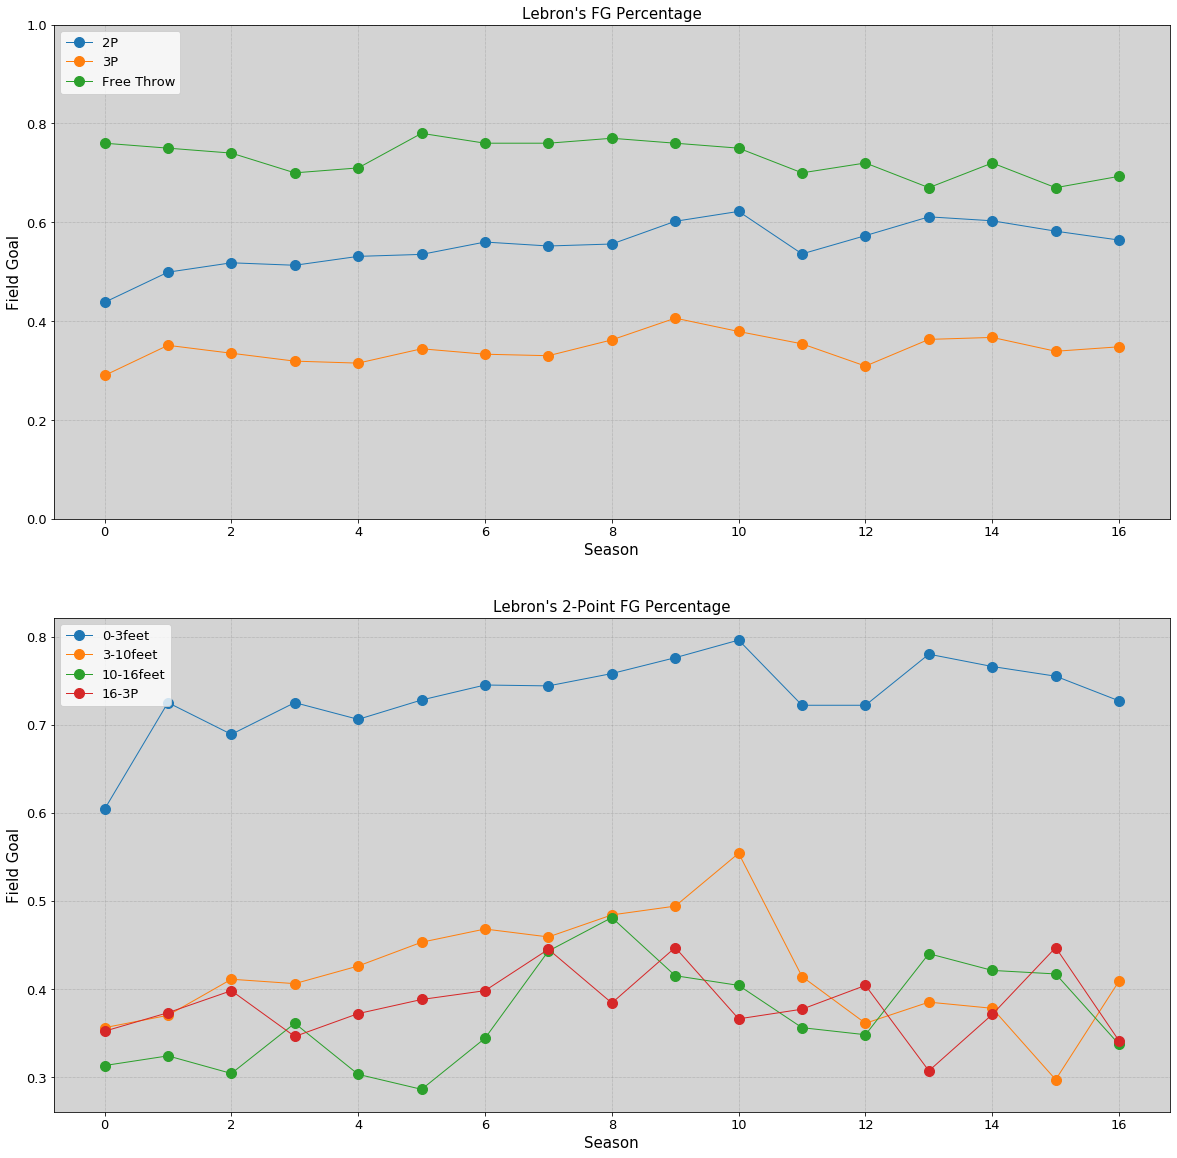

In [46]:
fig=plt.figure(figsize=(40,10))

ax=fig.add_subplot(2,1,1)
ax=df_FG_LBJ[['2P.1','3P.1','FT%']].plot(kind='line',marker='o',style='-',linewidth=1,ms=10,ax=ax)
ax.set_facecolor('lightgrey')
ax.set_title("Lebron's FG Percentage",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Field Goal',fontsize=15)
ax.set_ylim(0,1)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.set_xticks(np.arange(0,17, 2))
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.legend(['2P','3P','Free Throw'],loc='upper left',fontsize=13)

ax1=fig.add_subplot(2,1,2)
ax1=df_FG_LBJ[['0-3.1','3-10.1','10-16.1','16-3P.1']].plot(kind='line',marker='o',style='-',linewidth=1,ms=10,figsize=(20,20),ax=ax1)
ax1.set_facecolor('lightgrey')
ax1.set_title("Lebron's 2-Point FG Percentage",fontsize=15)
ax1.set_xlabel('Season',fontsize=15)
ax1.set_ylabel('Field Goal',fontsize=15)
ax1.legend(['0-3feet','3-10feet','10-16feet','16-3P'],loc='upper left',fontsize=13)
ax1.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax1.tick_params(axis='y', which='major', labelsize=13)
ax1.set_xticks(np.arange(0,17, 2))
ax1.grid(color='grey', linestyle='dotted', linewidth=0.5)
plt.show()

# Classification model for prediction

### Now that we have a better idea for the data, is time to create and apply the predictive model with Classification. We add in consideration all the above data as well as more advanced data.

## Logistic Regression

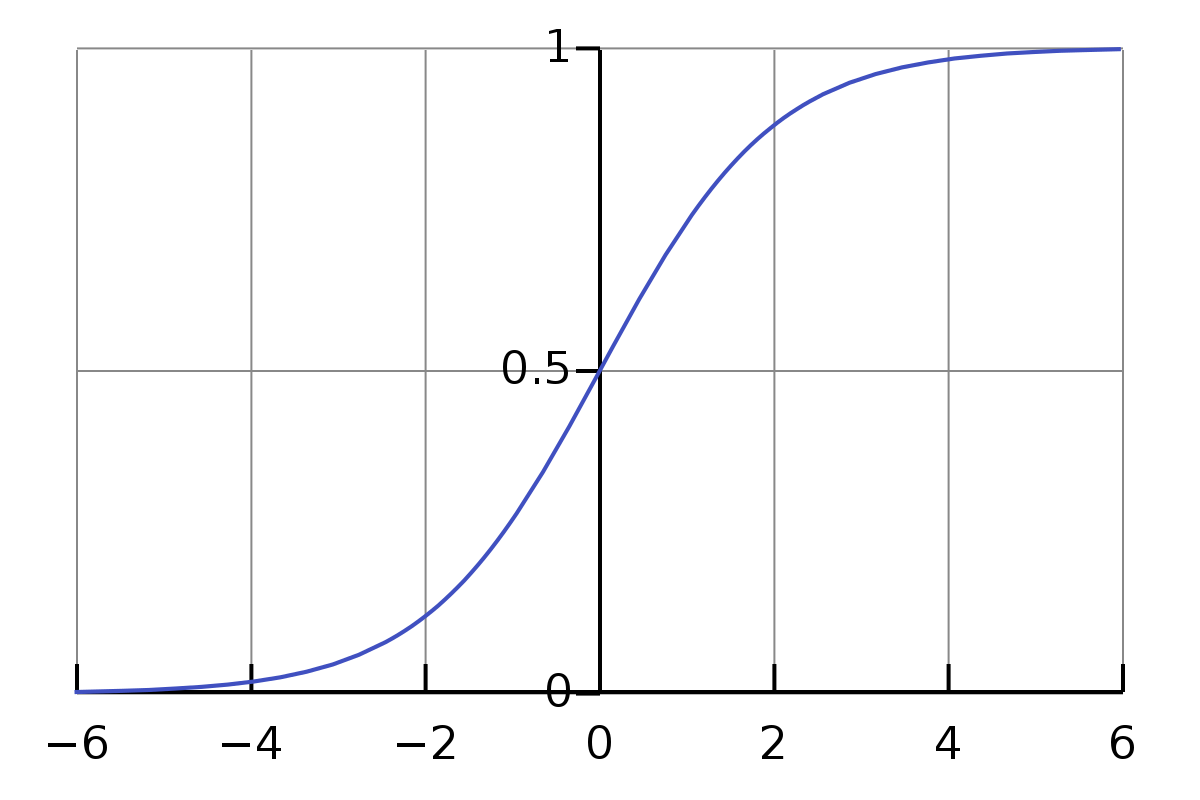

In [47]:
from IPython.display import Image
Image("logistic.png", width=500, height=500)

### Step 1: Data Selection (Define the DataFrame with X and y of the dataset)

In [48]:
df_1=dfnew[dfnew['RSorPO']=='Regular Season']
df_1=df_1[(df_1['Player']=='Lebron James') | (df_1['Player']=='Kobe Bryant')].reset_index()
df_1.drop(columns=['index','Age','Season','Tm','Lg','Pos','G','GS','MP','RSorPO','TRB','FG','3P','2P','FTA'],inplace=True)
df_1

,FGA,FG%,3PA,3P%,2PA,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Player
0,18.9,0.420,2.7,0.300,16.1,0.438,0.438,4.4,0.760,1.3,4.2,5.9,1.6,0.7,3.5,1.9,20.9,Lebron James
1,21.1,0.470,3.9,0.360,17.2,0.499,0.504,6.0,0.750,1.4,6.0,7.2,2.2,0.7,3.3,1.8,27.2,Lebron James
2,23.1,0.480,4.8,0.330,18.3,0.518,0.515,7.6,0.740,0.9,6.1,6.6,1.6,0.8,3.3,2.3,31.4,Lebron James
3,20.8,0.480,4.0,0.320,16.8,0.513,0.507,6.3,0.700,1.1,5.7,6.0,1.6,0.7,3.2,2.2,27.3,Lebron James
4,21.9,0.480,4.8,0.310,17.1,0.531,0.518,7.3,0.710,1.8,6.1,7.2,1.8,1.1,3.4,2.2,30.0,Lebron James
5,19.9,0.490,4.7,0.340,15.2,0.535,0.530,7.3,0.780,1.3,6.3,7.2,1.7,1.1,3.0,1.7,28.4,Lebron James
6,20.1,0.500,5.1,0.330,15.0,0.560,0.545,7.8,0.760,0.9,6.4,8.6,1.6,1.0,3.4,1.6,29.7,Lebron James
7,18.8,0.510,3.5,0.340,15.3,0.552,0.541,6.4,0.760,1.0,6.5,7.0,1.6,0.6,3.6,2.1,26.7,Lebron James
8,18.9,0.530,2.4,0.380,16.5,0.556,0.554,6.2,0.770,1.5,6.4,6.2,1.9,0.8,3.4,1.5,27.1,Lebron James
9,17.8,0.570,3.3,0.420,14.5,0.602,0.603,5.3,0.760,1.3,6.8,7.3,1.7,0.9,3.0,1.4,26.8,Lebron James


In [49]:
# ANOTHER WAY TO GET ONLY KOBE AND LEBRON
# df_1=dfnew[dfnew['RSorPO']=='Regular Season']
# df_1.drop(df_1[df_1['Player']=='Michael Jordan'].index)

### Step 2:Define X,y as arrays and Preprocessing (Logistic Regression requires Standardscaler) 

In [50]:
X = np.asarray(df_1[['FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 'eFG%','FT','FT%','ORB','DRB','AST','STL','BLK','TOV','PF','PTS']])
X[0:2]

array([[18.9  ,  0.42 ,  2.7  ,  0.3  , 16.1  ,  0.438,  0.438,  4.4  ,
         0.76 ,  1.3  ,  4.2  ,  5.9  ,  1.6  ,  0.7  ,  3.5  ,  1.9  ,
        20.9  ],
       [21.1  ,  0.47 ,  3.9  ,  0.36 , 17.2  ,  0.499,  0.504,  6.   ,
         0.75 ,  1.4  ,  6.   ,  7.2  ,  2.2  ,  0.7  ,  3.3  ,  1.8  ,
        27.2  ]])

In [58]:
y = np.asarray(df_1['Player'])
y[0:2]

array(['Lebron James', 'Lebron James'], dtype=object)

In [52]:
df_1.describe()

,FGA,FG%,3PA,3P%,2PA,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.286486,0.470892,4.183784,0.329405,15.094595,0.509838,0.507270,5.921622,0.786297,1.124324,5.113514,5.978378,1.491892,0.589189,3.302703,2.162162,25.508108
std,3.635257,0.046726,1.352264,0.042659,3.189300,0.054745,0.048188,1.543109,0.059419,0.314824,1.418952,1.814010,0.317436,0.270579,0.695815,0.541783,5.242846
min,5.900000,0.360000,1.700000,0.190000,4.000000,0.401000,0.411000,1.900000,0.670000,0.300000,1.200000,1.300000,0.700000,0.100000,1.600000,1.400000,7.600000
25%,18.200000,0.450000,3.300000,0.310000,14.000000,0.482000,0.482000,4.900000,0.750000,1.000000,4.200000,5.000000,1.300000,0.400000,3.000000,1.700000,25.200000
50%,19.900000,0.470000,4.100000,0.340000,15.200000,0.496000,0.502000,6.000000,0.810000,1.100000,4.900000,6.000000,1.500000,0.600000,3.300000,2.100000,27.000000
75%,20.900000,0.493000,5.100000,0.350000,17.100000,0.552000,0.541000,7.000000,0.840000,1.300000,6.100000,7.200000,1.700000,0.800000,3.600000,2.600000,27.900000
max,27.200000,0.570000,7.100000,0.420000,20.700000,0.622000,0.610000,8.700000,0.870000,1.800000,7.500000,10.200000,2.200000,1.100000,5.700000,3.300000,35.400000


In [53]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-0.10778265, -1.10417874, -1.11239407, -0.69882943,  0.31959164,
        -1.330324  , -1.45734379, -0.99967678, -0.44867952,  0.56570953,
        -0.65267508, -0.04380325,  0.34526406,  0.41518056,  0.2874595 ,
        -0.49056263, -0.89105638],
       [ 0.50574936, -0.01935098, -0.21275296,  0.72709092,  0.66925238,
        -0.20069975, -0.06880164,  0.05149312, -0.61929763,  0.8877288 ,
         0.63336516,  0.68272649,  2.2614796 ,  0.41518056, -0.0039378 ,
        -0.67768446,  0.32715618]])

In [54]:
X.shape

(37, 17)

### Step 3:Train/Test datasets (split the dataset in training and test sets)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (29, 17) (29,)
Test set: (8, 17) (8,)


### Step 4: Build Logistic Regression Model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [62]:
yhat = LR.predict(X_test)
yhat

array(['Kobe Bryant', 'Kobe Bryant', 'Lebron James', 'Lebron James',
       'Lebron James', 'Lebron James', 'Kobe Bryant', 'Lebron James'],
      dtype=object)

In [63]:
y_test

array(['Kobe Bryant', 'Kobe Bryant', 'Lebron James', 'Lebron James',
       'Lebron James', 'Lebron James', 'Kobe Bryant', 'Lebron James'],
      dtype=object)

In [66]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.55041687, 0.44958313],
       [0.54587039, 0.45412961],
       [0.45581147, 0.54418853],
       [0.39171563, 0.60828437],
       [0.41367161, 0.58632839],
       [0.40629225, 0.59370775],
       [0.57606036, 0.42393964],
       [0.45822243, 0.54177757]])

### Step 5: Use the model to predict Data

In [68]:
df_reg_new

,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,TRB,AST,STL,BLK,TOV,PTS
Season,,,,,,,,,,,,,,
2017-18,10.4,0.475,3.0,0.434,7.4,0.492,3.2,0.826,5.0,1.6,1.0,0.7,1.4,13.9
2018-19,13.1,0.450,3.9,0.373,9.2,0.483,2.9,0.855,6.0,2.1,1.1,0.7,1.5,15.7
2019-20,18.6,0.450,7.1,0.403,11.5,0.480,4.7,0.812,7.0,3.0,1.4,0.9,2.3,23.4


In [86]:
df_reg
df_reg.reset_index(inplace=True)
df_2=df_reg.drop(columns=['Age','Season','Tm','Lg','Pos','G','GS','MP','RSorPO','TRB','FG','3P','2P','FTA'])
df_2

,FGA,FG%,3PA,3P%,2PA,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Player
0,10.4,0.475,3.0,0.434,7.4,0.492,0.538,2.7,0.826,0.6,4.4,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum
1,13.1,0.450,3.9,0.373,9.2,0.483,0.506,2.5,0.855,0.9,5.2,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum
2,18.6,0.450,7.1,0.403,11.5,0.480,0.527,3.8,0.812,1.0,6.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum


In [92]:
df_2.describe()

,FGA,FG%,3PA,3P%,2PA,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000
mean,14.033333,0.458333,4.666667,0.403333,9.366667,0.485000,0.523667,3.00,0.831000,0.833333,5.2,2.233333,1.166667,0.766667,1.733333,2.1,17.666667
std,4.178915,0.014434,2.154840,0.030501,2.055075,0.006245,0.016258,0.70,0.021932,0.208167,0.8,0.709460,0.208167,0.115470,0.493288,0.0,5.046121
min,10.400000,0.450000,3.000000,0.373000,7.400000,0.480000,0.506000,2.50,0.812000,0.600000,4.4,1.600000,1.000000,0.700000,1.400000,2.1,13.900000
25%,11.750000,0.450000,3.450000,0.388000,8.300000,0.481500,0.516500,2.60,0.819000,0.750000,4.8,1.850000,1.050000,0.700000,1.450000,2.1,14.800000
50%,13.100000,0.450000,3.900000,0.403000,9.200000,0.483000,0.527000,2.70,0.826000,0.900000,5.2,2.100000,1.100000,0.700000,1.500000,2.1,15.700000
75%,15.850000,0.462500,5.500000,0.418500,10.350000,0.487500,0.532500,3.25,0.840500,0.950000,5.6,2.550000,1.250000,0.800000,1.900000,2.1,19.550000
max,18.600000,0.475000,7.100000,0.434000,11.500000,0.492000,0.538000,3.80,0.855000,1.000000,6.0,3.000000,1.400000,0.900000,2.300000,2.1,23.400000


In [88]:
X_new= np.asarray(df_2[['FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 'eFG%','FT','FT%','ORB','DRB','AST','STL','BLK','TOV','PF','PTS']])
X_new[:]

array([[10.4  ,  0.475,  3.   ,  0.434,  7.4  ,  0.492,  0.538,  2.7  ,
         0.826,  0.6  ,  4.4  ,  1.6  ,  1.   ,  0.7  ,  1.4  ,  2.1  ,
        13.9  ],
       [13.1  ,  0.45 ,  3.9  ,  0.373,  9.2  ,  0.483,  0.506,  2.5  ,
         0.855,  0.9  ,  5.2  ,  2.1  ,  1.1  ,  0.7  ,  1.5  ,  2.1  ,
        15.7  ],
       [18.6  ,  0.45 ,  7.1  ,  0.403, 11.5  ,  0.48 ,  0.527,  3.8  ,
         0.812,  1.   ,  6.   ,  3.   ,  1.4  ,  0.9  ,  2.3  ,  2.1  ,
        23.4  ]])

In [91]:
y_Tatum = LR.predict(X_new)
y_Tatum

array(['Lebron James', 'Lebron James', 'Lebron James'], dtype=object)

# The Science has spoken. All of the three seasons of Jason Taytum remind more King James rather than Kobe Legend